In [1]:
# import de tous les modules nécessaires à la réalisation du TP
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, model_selection
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from numpy.linalg import matrix_rank
import math
from scipy import stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import statistics

1. Importer la base de données data_dm3.csv disponible depuis le lien https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv. La dernière colonne est la variable à expliquer. Les autres colonnes sont les variables explicatives. Préciser le nombre de variables explicatives et le nombre d’observations.

In [2]:
# définition de l'url où récupérer les données
url = 'https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv'
data = pd.read_csv(url, sep=',', header = None)
# note: je fournis une commande alternative pour récupérer le fichier en local, l'import par URL posant parfois problème
# path = '/home/romain/tp3/data_dm3.csv'
# data = pd.read_csv(path, sep=',', header = None)
# display
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0
5,1.513286,0.072830,1.243039,-0.368609,-0.564998,-1.736720,-0.441544,-1.395122,-1.550146,0.941235,...,0.767162,0.417754,-1.010548,1.397951,0.074975,1.381528,-1.367316,1.200057,-0.292088,97.0
6,-0.501760,0.191544,-0.225878,-0.240506,1.350852,-1.253936,1.319458,2.007870,0.423578,0.417597,...,0.382681,-0.146417,-0.529950,-0.568923,0.340738,-1.312723,-0.366522,-0.347242,1.055200,138.0
7,-1.012528,-1.383290,0.686803,2.146420,1.255864,0.806962,0.137307,0.699977,-1.311624,-0.999770,...,-0.444868,-1.175901,0.481975,-0.329621,-1.712838,-0.047186,0.039768,-0.403074,0.249330,63.0
8,0.532639,1.691226,-0.008375,-1.478906,1.278352,-0.176214,-0.806066,0.515730,0.786887,-0.984347,...,0.183080,-0.194879,0.669917,-1.899072,0.122637,0.959231,-0.078359,-0.117192,1.664998,110.0
9,-0.537216,-0.128677,-0.815059,-1.273897,-0.985841,1.021629,-0.956690,1.009193,-0.030585,1.137275,...,-0.559667,-0.178620,1.130455,-1.158422,-0.376790,0.512715,-0.618469,1.463988,1.519603,310.0


In [3]:
# taille du set
nobs, nvar = data.shape
# on enlève la colonne finale qui est celle de la variable expliquée
nvar -= 1
# affichage des résultats
print("le nombre d'observations est " + str(nobs) + ".")
print("le nombre de variables explicatives est " + str(nvar) + ".")

le nombre d'observations est 442.
le nombre de variables explicatives est 210.


2. Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à expliquer ? Tracer un scatter plot de la base de données avec 4 covariables prises au hasard et la variable à expliquer (un scatterplot regroupe les graphes de chacune des variables en fonction de chacune des autres). Commenter les graphiques obtenus.

In [4]:
# on sépare X (les variables explicatives ou features) de y (la variable expliquée)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
# moyenne de chaque colonne
col_mean = X.mean(axis=0)
# comparaison avec 0
centrage = np.allclose(np.zeros(nvar), col_mean)
# écart-type de chaque colonne
col_std = X.std(axis=0, ddof = 0)
# comparaison avec 1
normalisation = np.allclose(np.ones(nvar), col_std)
# affichage
print("Les variables explicatives sont centrées: " + str(centrage) + ".")
print("Les variables explicatives sont normalisées: " + str(normalisation) + ".")

Les variables explicatives sont centrées: True.
Les variables explicatives sont normalisées: True.


On constate donc que les variables explicatives sont centrées et normalisées (pour chacune, la moyenne est arbitrairement proche de 0 et l'écart-type est arbitrairement proche de 1.

In [5]:
# moyenne de y
y_mean = y.mean(axis=0)
# écart-type de y
y_std = y.std(axis=0, ddof = 0)
# affichage
print("La moyenne de y est de " + str(round(y_mean, 2)) + " et son écart-type est de " + str(round(y_std, 2)) + ".")
print("On constate que y n'est ni centré, ni normalisé.")

La moyenne de y est de 152.13 et son écart-type est de 77.01.
On constate que y n'est ni centré, ni normalisé.


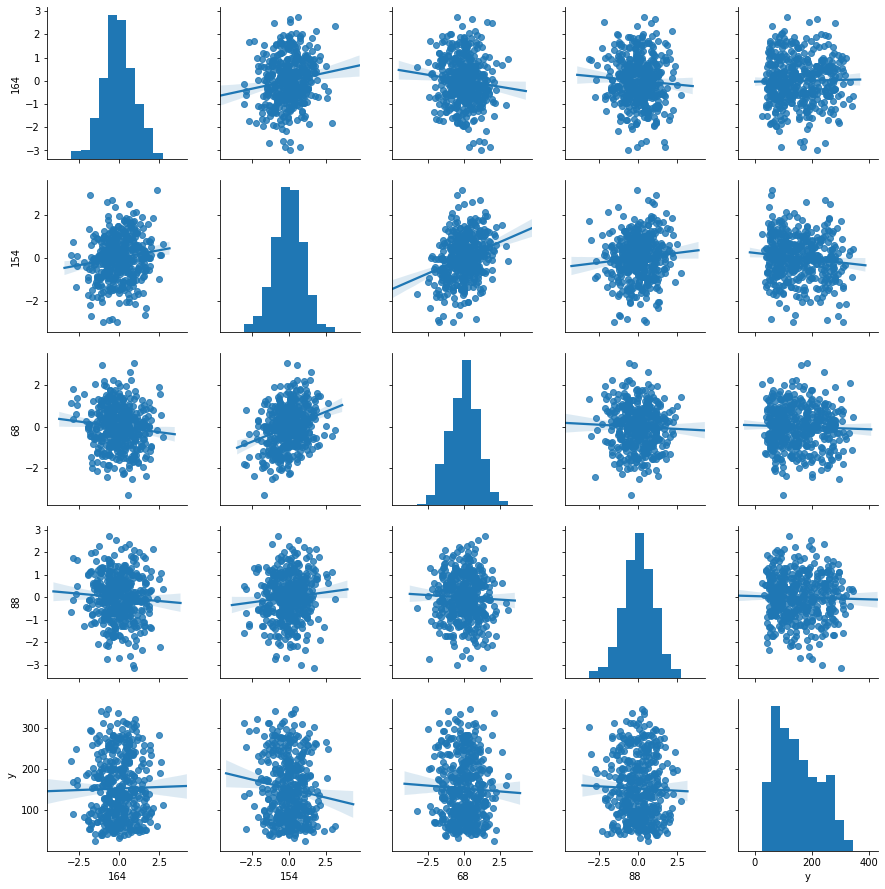

In [6]:
# on choisit 4 covariables au hasard et on ajoute la dernière colonne (la variable expliquée)
random_val = random.choices(range(0, nvar - 1), k=4)
random_val.append(nvar)
random_data = data.iloc[:, random_val]
random_data = random_data.rename(columns={nvar: "y"})
# traçage du scatterplot
fig = sns.pairplot(random_data, kind="reg")

Il apparaît clairement deux résultats. D'une part, les variables explicatives sont peu corrélées entre elles. Les scatterplot montrent des nuages de point sans relations particulière, qui donnent l'impression que le robot farceur a généré ses variables de manières procédurales et indépendantes les unes des autres. D'autre part, et c'est ce qui est le plus important, les variables explicatives semblent être très peu corrélées à la variable expliquée $y$. On le voit de manière très claire sur la dernière ligne, où les nuages de point sont totalement aléatoires et ne suggèrent aucune covariance. Les régressions, ajoutées sur les nuages, sont virtuellement plates, suggèrant des coefficients de valeur 0. De manière globale, on peut donc dire que les variables crées par le robot farceur ont très peu de pouvoir prédictif et que faire une regression sur ces données conduira certainement à de piètres résultats pour expliquer $y$.

3. Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle Xtrain , un pour tester le modèle Xtest . On mettra 20% de la base dans l’échantillon ’test’. Donner les tailles de chacun des 2 échantillons. On notera que le nouvel échantillon de covariables Xtrain n’est pas normalizé. Dans la suite, on fera donc bien attention à inclure l’intercept dans nos régression.

In [7]:
# création des échantillons d'apprentissage et de test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state = 42)
# nombre de données dans chaque échantillon
nobs_train, nvar_train = X_train.shape
nobs_test, nvar_test = X_test.shape
print("La taille de l'échantillon train est de " + str(nobs_train) + ".")
print("La taille de l'échantillon test est de " + str(nobs_test) + ".")

La taille de l'échantillon train est de 353.
La taille de l'échantillon test est de 89.


4. Donner la matrice de covariance calculée sur Xtrain . Tracer le graphe de la décroissance des valeurs propres de la matrice de covariance (ou de corrélation). Expliquer pourquoi il est légitime de ne garder que les premières variables de l’ACP. On gardera 60 variables dans la suite.

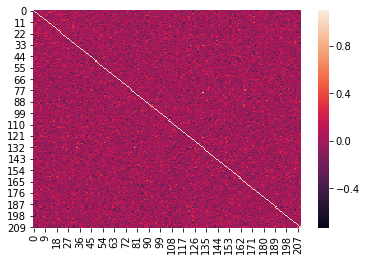

In [8]:
# création de la matrice de variance-covariance
var_cov = X_train.cov()
# représentation graphique de la matrice
sns.heatmap(var_cov);

On se rend compte que la plupart des covariances sont proches de 0: les variables semblent pas ou peu corrélées entre elles.

In [9]:
# calcul des valeurs propres et vecteurs propres par la décomposition en valeurs singulières
U, S, Vh = np.linalg.svd(var_cov)

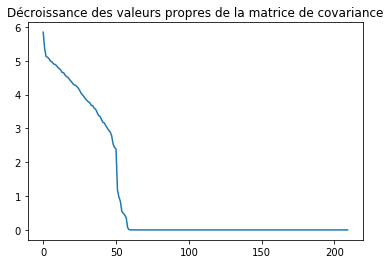

In [10]:
# représentation graphique des valeurs propres, par ordre décroissant
fig = plt.figure()
plt.plot(S);
plt.title('Décroissance des valeurs propres de la matrice de covariance');

On observe que les valeurs propres sont virtuellement égales à 0 au-delà de la 60ème. Il convient donc d'omettre les varaibles au-delà de la 60ème. Autrement, on estimerait notre modèle avec une matrice X mal conditionnée, et les petites valeurs propres entraineraient des coefficients larges et une forte variance de l'estimateur. Autrement dit, notre estimateur souffrirait d'une forte imprécision. Il convient donc d'éliminer les variables qui correspondent aux valeurs propres proches de 0.

5. Suivant les observations de la question (Q4), appliquer la méthode de "PCA before OLS" qui consiste à appliquer OLS avec Y et Xtrain V(1:60) , où V(1:60) contient les vecteurs propres (associés aux 60 plus grandes valeurs propres) de la matrice de covariance. Faire une régression linéaire (avec intercept), puis tracer les valeurs des coefficients (hors intercept). Sur un autre graphique, faire de même avec la méthode des moindres carrés classique.

Note préliminaire: on travaille pour cette question sur les données non centrées. Celà est sans conséquence puisqu'on car on inclut un intercept dans la regression, qui va donc recentrer toutes les données lors de l'estimation.

In [11]:
# on a besoin ici de convertir le dataframe pandas en numpy
X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values
# on applique la méthode PCA before OLS: pour celà, on garde seulement les 60 premières colonnes de U
U60 = U[:,0:60]
# on calcule la matrice X_train avec ACP
X_train_acp = X_train_np @ U60
# on calcule la matrice X_test avec ACP
X_test_acp = X_test_np @ U60
# estimation de la regression avec ACP
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train_acp, y_train_np)
theta_acp = reg.coef_
theta0_acp = reg.intercept_
# estimation de la regression sans ACP
reg.fit(X_train_np, y_train_np)
theta_noacp = reg.coef_
theta0_noacp = reg.intercept_

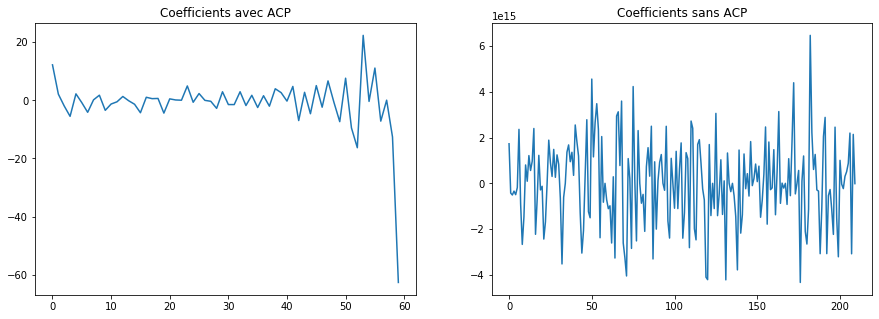

In [12]:
# traçage du graphique des coefficients avec et sans ACP
plt.close("all")
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.title('Coefficients avec ACP')
plt.plot(theta_acp);
plt.subplot(122)
plt.title('Coefficients sans ACP')
plt.plot(theta_noacp);

On se rend compte que sans ACP, les coefficients prennent des valeurs extrêmement larges. L'estimation est donc très imprécise, et ce modèle sera très inefficace pour réaliser des prédictions. On note aussi que pour le modèle avec ACP, on obtient un coefficient très large par rapport aux autres (le dernier). Celà signifie sans doute qu'on a gardé une valeur propre très petite qu'il aurait mieux valu écarter.

6. Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur moyenne de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux ? Commenter. Uniquement pour cette question, centrer et réduire les variables après ACP (de petite dimension). Faire une régression avec ces variables et vérifier que l’intercept est bien égal à la moyenne de Y sur le train.

In [13]:
# note: on a déjà estimé les intercepts des deux regressions à la question précédente
print("L'intercept pour la régression avec ACP est de " + str(round(theta0_acp, 3)) + ".")
print("L'intercept pour la régression sans ACP est de " + str(round(theta0_noacp, 3)) + ".")
print("La valeur moyenne de y sur le train set est de " + str(round(np.mean(y_train), 3)) + ".")

L'intercept pour la régression avec ACP est de 152.111.
L'intercept pour la régression sans ACP est de 152.369.
La valeur moyenne de y sur le train set est de 153.737.


Les intercepts des deux regressions ne sont pas strictement égaux mais ils sont proches. La différence est probablement due à une légère imprécision numérique. On note que les deux intercepts sont aussi proches de la valeur moyenne de $y$ sur le train set. On peut en conclure que même lorsque le modèle est mal conditionné (comme c'est le cas pour la régression sans ACP), la moyenne est capturée de manière adéquate.

In [14]:
# centrage-réduction des variables explicatives après ACP
sc = StandardScaler()
X_train_cr = sc.fit_transform(X_train_acp)
# estimation de la régression
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X_train_cr, y_train_np)
theta_cr = reg.coef_
theta0_cr = reg.intercept_
print("La valeur de l'intercept pour la régression avec les variables centrées réduites et de " + str(round(theta0_cr, 3)) + ".")
print("Pour rappel, la valeur de la moyenne de y sur l'échantillon test est de " + str(round(np.mean(y_train), 3)) + ".")

La valeur de l'intercept pour la régression avec les variables centrées réduites et de 153.737.
Pour rappel, la valeur de la moyenne de y sur l'échantillon test est de 153.737.


On constate qu'avec le modèle où les variables explicatives sont centrées-réduites, l'intercept parvient bien à capturer la moyenne de $y$ sur le train set. Le processus de centrage-réduction affecte donc les autres coefficients de la régression, mais laisse la constante inchangée.

7. Pour les 2 méthodes (OLS et PCA before OLS) : Tracer les résidus de la prédiction sur l’échantillon test. Tracer leur densité (on pourra par exemple utiliser un histogramme). Calculer le coefficient de détermination sur l’échantillon test. Calculer le risque de prédiction sur l’échantillon test.

In [15]:
# residus de la régression avec ACP
reg.fit(X_train_acp, y_train_np)
pred_acp = reg.predict(X_test_acp)
res_acp = y_test_np - pred_acp
# residus de la regression sans ACP
reg.fit(X_train_np, y_train_np)
pred_noacp = reg.predict(X_test_np)
res_noacp = y_test_np - pred_noacp

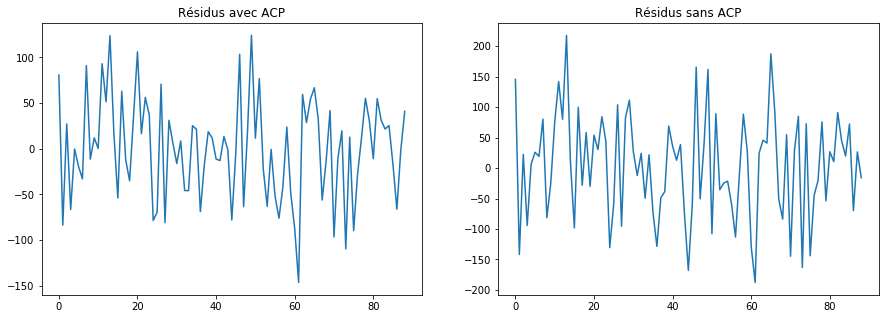

In [16]:
# traçage du graphique des résidus avec et sans ACP
plt.close("all")
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.title('Résidus avec ACP')
plt.plot(res_acp)
plt.subplot(122)
plt.title('Résidus sans ACP')
plt.plot(res_noacp);


On remarque que les résidus du modèle avec ACP sont significativement meilleurs que ceux du modèle sans ACP. Leur amplitude est plus petite (plus ou moins 100) que celle des résidus sans ACP (plus ou moins 150-200).

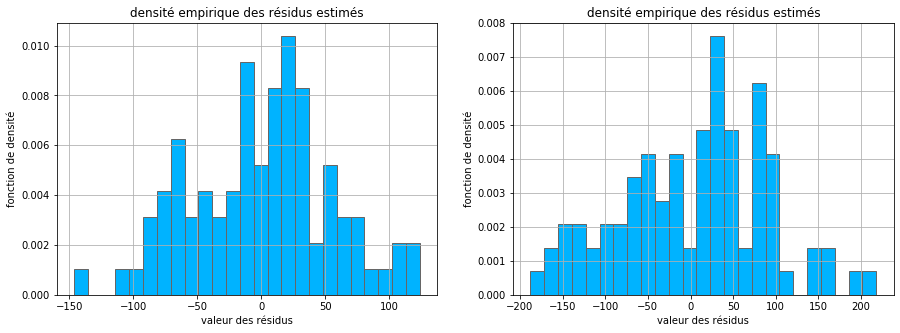

In [17]:
# traçage des histogrammes des résidus
plt.close("all")
fig3 = plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.title('Densité des résidus avec ACP')
plt.hist(res_acp, bins = 25, density = True, color = (0, 0.7, 1), edgecolor=(0.4, 0.4, 0.4))
plt.xlabel('valeur des résidus')
plt.ylabel('fonction de densité')
plt.title('densité empirique des résidus estimés')
plt.grid(True)
plt.subplot(122)
plt.title('Densité des résidus sans ACP')
plt.hist(res_noacp, bins = 25, density = True, color = (0, 0.7, 1), edgecolor=(0.4, 0.4, 0.4))
plt.xlabel('valeur des résidus')
plt.ylabel('fonction de densité')
plt.title('densité empirique des résidus estimés')
plt.grid(True)
plt.show()

Le graphique de densité des résidus confirme les résultats précédents. A savoir, que l'amplitude des résidus avec ACP est moindre que celle des résidus sans ACP. Les résidus avec ACP semblent également mieux concentrés autour de la valeur 0, et leur forme rappelle d'avantage une distribution Gaussienne. L'hypothèse de normalité est ici plausible pour les résidus avec ACP. Elle est moins concluante pour les résidus sans ACP.

In [18]:
# calcul des coefficients de détermination pour les deux modèles
r2_acp = r2_score(y_test_np, pred_acp)
r2_noacp = r2_score(y_test_np, pred_noacp)
print("Le coefficient de détermination R2 pour le modèle avec ACP est de " + str(round(r2_acp, 3)) + ".")
print("Le coefficient de détermination R2 pour le modèle sans ACP est de " + str(round(r2_noacp, 3)) + ".")

Le coefficient de détermination R2 pour le modèle avec ACP est de 0.428.
Le coefficient de détermination R2 pour le modèle sans ACP est de -0.378.


Le coefficient de détermination est significativement plus grand pour le modèle avec ACP (environ 0.43) qu'il ne l'est avec le modèle sans ACP (environ -0.38). La valeur négative pour le modèle sans ACP peut paraître surprenante, mais elle est possible. Elle signifie seulement que le modèle prédictif fait moins bien que la simple moyenne des données en terme de prédiction. Cela n'est guère surprenant, puisque le modèle sans ACP est extrêment imprécis du aux nombreuses variables non pertinentes qu'il contient. Le modèle avec ACP à l'inverse réalise une performance correcte avec un coefficient de détermination à 0.43. Dans notre cas, on conclut donc que l'ACP avant régression a bien contribué à améliorer la capacité prédictive du modèle.

Note: pour le calcul du risque prédictif, j'utilise la formule des slides (slide9 de la partie "Modèle linéaire: propriétés), à savoir:

$R_{pred}(\theta^*, \hat{\theta}) = \frac{rang(X)}{n} \sigma^2$

Cette formule est un peu différente de celle vue en cours, qui ne normalise pas par $n$, par exemple.

In [19]:
# variance empirique des résidus pour le modèle avec ACP 
sigma2_acp = res_acp @ res_acp / (nobs_test - 1)
# rang de X_test_acp
rank_acp = matrix_rank(X_test_acp)
# risque prédictif avec ACP 
rpred_acp = rank_acp * sigma2_acp / nobs_test
# variance empirique des résidus pour le modèle sans ACP 
sigma2_noacp = res_noacp @ res_noacp / (nobs_test - 1)
# rang de X_test
rank_noacp = matrix_rank(X_test_np)
# risque prédictif sans ACP 
rpred_noacp = rank_noacp * sigma2_noacp / nobs_test
print("Le risque prédictif avec ACP sur l'échantillon test est de " + str(round(rpred_acp, 3)) + ".")
print("Le risque prédictif sans ACP sur l'échantillon test est de " + str(round(rpred_noacp, 3)) + ".")

Le risque prédictif avec ACP sur l'échantillon test est de 2067.443.
Le risque prédictif sans ACP sur l'échantillon test est de 4978.945.


On constate que le risque prédictif est plus de deux fois plus élevé sans ACP qu'avec (2000 environ pour l'ACP, 5000 sans ACP). Réaliser une ACP permet donc pour ce modèle d'améliorer significativement la performance prédictive, même si une valeur de 2000 reste élevée.

8. Coder la méthode de forward variable sélection. On pourra utiliser la statistique du test de nullité du coefficient (comme vu en cours). Pour l’instant, on ne met pas de critère d’arret sur la méthode. C’est à dire que l’on ajoute une variable à chaque étape jusqu’à retrouver la totalité des variables. Afficher l’ordre de séléction des variables.

Note: la description de la méthode de forward selection est différente entre le poly et les slides. Le poly (section 3.3 p 25) préconise d'utiliser une constante dans la régression. A l'inverse, les slides (partie tests statistiques, slides 15 à 17) recommendent d'estimer les régressions sans constante, et d'inclure à la place la constante comme une feature parmi les autres (une colonne de 1 en plus des autres features). On fait donc tourner l'algorithme sur $p+1$ features et non $p$. Je fais le choix de suivre ce qui me paraît le plus cohérent: j'inclus une constante dans chaque régression pour enlever l'impact de la moyenne.

In [20]:
# initialisation de l'algorithme
new_y = y_train
new_X = X_train
reg_forward = linear_model.LinearRegression(fit_intercept=True)
final_X = pd.DataFrame()
# on boucle un nombre de fois suffisant pour sélectionner toutes les variables
for i in range(nvar):
    # on ré-initialise la t-stat max, le coefficient selectionné, l'indice correspondant, et la meilleure prediction
    max_tstat = -1000
    best_theta = 0
    best_index = 0
    best_pred = new_y
    # on compte le nombre de features restants
    new_nvar = len(new_X.columns)
    # on boucle sur les features, un par un
    for j in range(new_nvar):
        # on définit le feature de régression
        new_x = new_X.iloc[:,j].to_frame()
        # on estime la régression
        reg_forward.fit(new_x, new_y)
        # on estime les résidus
        new_pred = reg_forward.predict(new_x)
        new_res = new_y - new_pred
        # on estime l'ecart type empirique des résidus
        new_sigma_hat = math.sqrt(new_res @ new_res / (nobs_train - 2))
        # on calcule l'ecart type du regresseur
        temp_x = new_X.iloc[:,j]
        new_s_hat = math.sqrt(1 / (temp_x @ temp_x))
        # on prend le coefficient de la regression
        new_theta = reg_forward.coef_[0]
        # calcul de la t-stat
        new_tstat = abs(new_theta / (new_sigma_hat * new_s_hat))
        # mise a jour si t-stat est plus grand que max_stat
        if (new_tstat > max_tstat):
            max_tstat = new_tstat
            best_theta = new_theta
            best_index = j
            best_pred = new_pred
    # une fois bouclé sur toutes les variables, on ajoute la meilleure
    best_x = new_X.iloc[:,best_index].to_frame()
    final_X = pd.concat([final_X, best_x], axis=1)
    # on affiche le résultat
    print("Ajouté la variable " + str(new_X.columns.tolist()[best_index]) + " (t-stat = " + str(round(max_tstat, 3)) + ").")
    # mise à jour de X et y
    new_y = new_y - best_pred
    new_X = new_X.drop(new_X.columns[[best_index]], axis='columns')
    

Ajouté la variable 58 (t-stat = 14.236).
Ajouté la variable 123 (t-stat = 6.722).
Ajouté la variable 167 (t-stat = 2.661).
Ajouté la variable 133 (t-stat = 3.307).
Ajouté la variable 13 (t-stat = 2.101).
Ajouté la variable 5 (t-stat = 2.061).
Ajouté la variable 129 (t-stat = 1.865).
Ajouté la variable 31 (t-stat = 1.688).
Ajouté la variable 146 (t-stat = 1.737).
Ajouté la variable 48 (t-stat = 1.751).
Ajouté la variable 34 (t-stat = 1.489).
Ajouté la variable 135 (t-stat = 1.825).
Ajouté la variable 130 (t-stat = 1.373).
Ajouté la variable 10 (t-stat = 1.343).
Ajouté la variable 113 (t-stat = 1.216).
Ajouté la variable 80 (t-stat = 1.295).
Ajouté la variable 191 (t-stat = 1.071).
Ajouté la variable 143 (t-stat = 0.964).
Ajouté la variable 206 (t-stat = 0.924).
Ajouté la variable 174 (t-stat = 0.899).
Ajouté la variable 136 (t-stat = 0.879).
Ajouté la variable 72 (t-stat = 0.835).
Ajouté la variable 198 (t-stat = 0.922).
Ajouté la variable 53 (t-stat = 0.783).
Ajouté la variable 110 (t-

9. Critère d’arrêt : On décide d’arrêter lorsque la p-valeur dépasse 0.1. Illustrer la méthode en donnant (i) les 3 graphes des statistiques obtenues lors de la sélection de la 1er, 2eme et 3eme variables (en abscisse : l’index des variables, en ordonné : la valeur des stats) , (ii) le graphe des 50 premières p-valeurs (dont chacune est associée à la variable sélectionnée). Sur ce même graphe, on tracera la ligne horizontale d’ordonnée 0.1. Enfin on donnera la liste des variables sélectionnées.

on commence par un algorithme à trois iterations seulement, pour les graphs des premières, seconde et troisième variables:

In [21]:
# initialisation de l'algorithme
new_y = y_train
new_X = X_train
final_X = pd.DataFrame()
reg_forward = linear_model.LinearRegression(fit_intercept=True)
# on crée un array de zeros pour enregistrer les t-stats
t_stats = np.zeros((len(X_train.columns), 4))
t_stats[:,0] = range(len(X_train.columns))
for i in range(3):
    # on crée un indice des colonnes
    indices = list(new_X.columns)
    # on ré-initialise la t-stat max, le coefficient selectionné, l'indice correspondant, et la meilleure prediction
    max_tstat = -1000
    min_pvalue = 1000
    best_theta = 0
    best_index = 0
    best_pred = new_y
    # on compte le nombre de features restants
    new_nvar = len(new_X.columns)
    # on boucle sur les features, un par un
    for j in range(new_nvar):
        # on définit le feature de régression
        new_x = new_X.iloc[:,j].to_frame()
        # on estime la régression
        reg_forward.fit(new_x, new_y)
        # on estime les résidus
        new_pred = reg_forward.predict(new_x)
        new_res = new_y - new_pred
        # on estime l'ecart type empirique des résidus
        new_sigma_hat = math.sqrt(new_res @ new_res / (nobs_train - 2))
        # on calcule l'ecart type du regresseur
        temp_x = new_X.iloc[:,j]
        new_s_hat = math.sqrt(1 / (temp_x @ temp_x))
        # on prend le coefficient de la regression
        new_theta = reg_forward.coef_[0]
        # calcul de la t-stat
        new_tstat = abs(new_theta / (new_sigma_hat * new_s_hat))
        t_stats[indices[j],i+1] = new_tstat
        # mise a jour si t-stat est plus grand que max_stat
        if (new_tstat > max_tstat):
            max_tstat = new_tstat
            best_theta = new_theta
            best_index = j
            best_pred = new_pred
    # une fois bouclé sur toutes les variables, on ajoute la meilleure
    best_x = new_X.iloc[:,best_index].to_frame()
    final_X = pd.concat([final_X, best_x], axis=1)
    # on affiche le résultat
    print("Ajouté la variable " + str(new_X.columns.tolist()[best_index]) + " (t-stat = " + str(round(max_tstat, 3)) + ").")
    # mise à jour de X et y
    new_y = new_y - best_pred
    new_X = new_X.drop(new_X.columns[[best_index]], axis='columns')

Ajouté la variable 58 (t-stat = 14.236).
Ajouté la variable 123 (t-stat = 6.722).
Ajouté la variable 167 (t-stat = 2.661).


on fait maintenant un algorithme à 50 iterations, en gardant à chaque itération la meilleure p-value (celle-ci correspond simplement à la meilleure t-stat), pour le graphique des 50 p-values.

In [22]:
# initialisation de l'algorithme
new_y = y_train
new_X = X_train
final_X = pd.DataFrame()
reg_forward = linear_model.LinearRegression(fit_intercept=True)
continue_algo = True
# on crée un array de zeros pour enregistrer les p-value
p_values = np.zeros((50, 2))
# on boucle 50 fois
for i in range(50):
    # on crée un indice des colonnes
    indices = list(new_X.columns)
    # on ré-initialise la t-stat max, le coefficient selectionné, l'indice correspondant, et la meilleure prediction
    max_tstat = -1000
    best_theta = 0
    best_index = 0
    best_pred = new_y
    # on compte le nombre de features restants
    new_nvar = len(new_X.columns)
    # on boucle sur les features, un par un
    for j in range(new_nvar):
        # on définit le feature de régression
        new_x = new_X.iloc[:,j].to_frame()
        # on estime la régression
        reg_forward.fit(new_x, new_y)
        # on estime les résidus
        new_pred = reg_forward.predict(new_x)
        new_res = new_y - new_pred
        # on estime l'ecart type empirique des résidus
        new_sigma_hat = math.sqrt(new_res @ new_res / (nobs_train - 2))
        # on calcule l'ecart type du regresseur
        temp_x = new_X.iloc[:,j]
        new_s_hat = math.sqrt(1 / (temp_x @ temp_x))
        # on prend le coefficient de la regression
        new_theta = reg_forward.coef_[0]
        # calcul de la t-stat
        new_tstat = abs(new_theta / (new_sigma_hat * new_s_hat))
        # mise a jour si t-stat est plus grand que max_stat
        if (new_tstat > max_tstat):
            max_tstat = new_tstat
            best_theta = new_theta
            best_index = j
            best_pred = new_pred
    # une fois bouclé sur toutes les variables, on ajoute la meilleure
    best_x = new_X.iloc[:,best_index].to_frame()
    # calcul de la p-value
    new_pvalue = 2*(1 - stats.t.cdf(max_tstat, nobs_train - 2))
    p_values[i, 0] = indices[best_index]
    p_values[i, 1] = new_pvalue
    # mise à jour de final_X
    if(new_pvalue > 0.1):
        continue_algo = False
    if(continue_algo):
        final_X = pd.concat([final_X, best_x], axis=1)
    # on affiche le résultat
    print("Ajouté la variable " + str(new_X.columns.tolist()[best_index]) + " (t-stat = " + str(round(max_tstat, 3)) + ", p-value = " + str(round(new_pvalue, 3)) + ").")
    # mise à jour de X et y
    new_y = new_y - best_pred
    new_X = new_X.drop(new_X.columns[[best_index]], axis='columns')

Ajouté la variable 58 (t-stat = 14.236, p-value = 0.0).
Ajouté la variable 123 (t-stat = 6.722, p-value = 0.0).
Ajouté la variable 167 (t-stat = 2.661, p-value = 0.008).
Ajouté la variable 133 (t-stat = 3.307, p-value = 0.001).
Ajouté la variable 13 (t-stat = 2.101, p-value = 0.036).
Ajouté la variable 5 (t-stat = 2.061, p-value = 0.04).
Ajouté la variable 129 (t-stat = 1.865, p-value = 0.063).
Ajouté la variable 31 (t-stat = 1.688, p-value = 0.092).
Ajouté la variable 146 (t-stat = 1.737, p-value = 0.083).
Ajouté la variable 48 (t-stat = 1.751, p-value = 0.081).
Ajouté la variable 34 (t-stat = 1.489, p-value = 0.137).
Ajouté la variable 135 (t-stat = 1.825, p-value = 0.069).
Ajouté la variable 130 (t-stat = 1.373, p-value = 0.171).
Ajouté la variable 10 (t-stat = 1.343, p-value = 0.18).
Ajouté la variable 113 (t-stat = 1.216, p-value = 0.225).
Ajouté la variable 80 (t-stat = 1.295, p-value = 0.196).
Ajouté la variable 191 (t-stat = 1.071, p-value = 0.285).
Ajouté la variable 143 (t-st

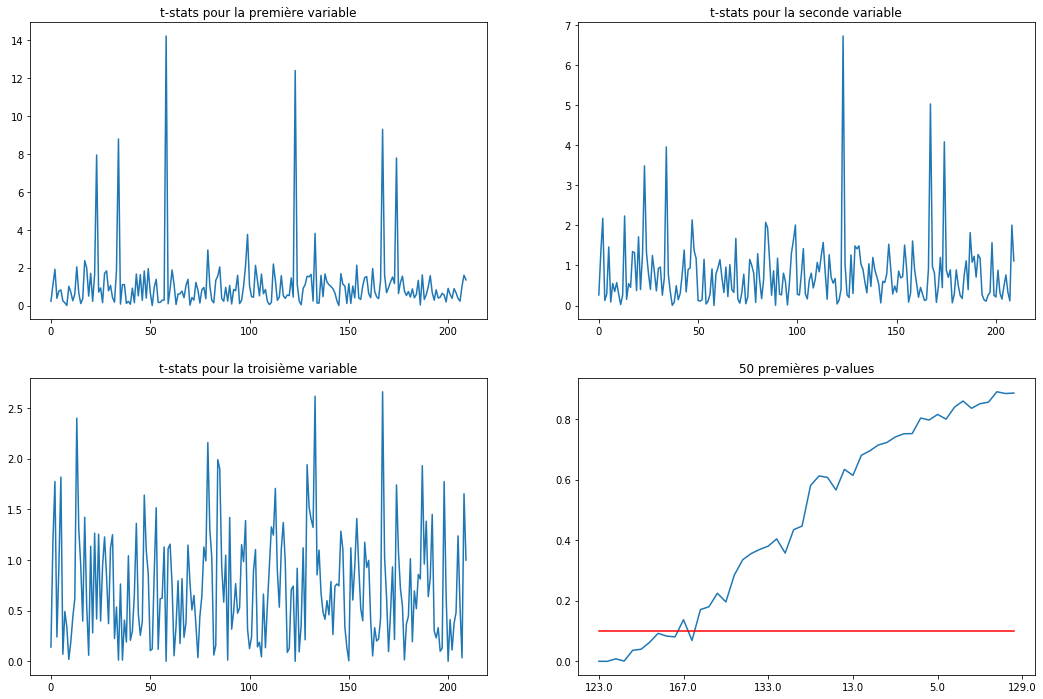

In [23]:
# traçage des graphiques
plt.close("all")
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs[0, 0].plot(t_stats[:,0], t_stats[:,1])
axs[0, 0].set_title('t-stats pour la première variable')
axs[0, 1].plot(t_stats[:,0], t_stats[:,2])
axs[0, 1].set_title('t-stats pour la seconde variable')
axs[1, 0].plot(t_stats[:,0], t_stats[:,3])
axs[1, 0].set_title('t-stats pour la troisième variable')
axs[1, 1].plot(np.arange(len(p_values[:,0])), p_values[:,1])
axs[1, 1].plot(np.arange(len(p_values[:,0])), 0.1 * np.ones((50, 1)), color='red')
axs[1, 1].set_xticklabels(p_values[:,0])
axs[1, 1].set_title('50 premières p-values');

On constate que la taille des t-stats restantes décroît à mesure de la sélection: une fois enlevée la variable 58 (et son pic à 14.23) à la première itération, la seconde t-stat n'est plus qu'à 6.72 à la seconde itération, pour la variable 123. A la troisième itération, on est à un maximum de 2.66 seulement pour la variable 167, etc... Le dernier graphique montre la sélection par p-valeurs. On voit que ces dernières augmentent rapidement. Si on conserve uniquement les p-valeurs inférieures à 0.1, on ne garde que 10 variables, comme le montre la courbe. Comme le montrent les résultats de l'algorithme ci-dessus, Ces variables sont les variables 58, 123, 167, 133, 13, 5, 129, 31, 146, et 48. La variable 135 a une p-valeur inférieure à 0.1, mais l'algortihme s'est déjà arrêté à ce moment là puisqu'à la onzième itération, toutes les p-valeurs étaient supérieures à 0.1 (la p-valeur maximum prenait une valeur de 0.137).

10. Appliquer OLS sur les variables sélectionnées. Donner le risque de prédiction obtenu pour l’échantillon test et le comparer à ceux de OLS et PCA before OLS.

In [24]:
# on convertit le dataframe final_X en format numpy, que l'on nomme X_forward
X_fwd = final_X.values
# estimation de la regression avec les variables de la forward selection
reg_fwd = linear_model.LinearRegression(fit_intercept=True)
reg_fwd.fit(X_fwd, y_train_np)
# création d'un X_test avec juste les variables sélectionnées
X_test_fwd = data[list(final_X)].iloc[list(X_test.index.values)]
# residus de la régression avec forward selection
pred_fwd = reg_fwd.predict(X_test_fwd)
res_fwd = y_test_np - pred_fwd
# variance empirique des résidus pour le modèle avec ACP 
sigma2_fwd = res_fwd @ res_fwd / (nobs_test - 1)
# rang de X_fwd
rank_fwd = matrix_rank(X_test_fwd)
# calcul du risque prédictif, en reprenant la formule de l'exercice 7
rpred_fwd = rank_fwd * sigma2_fwd / nobs_test
# affichage des résultats
print("Le risque prédictif sans ACP sur l'échantillon test est de " + str(round(rpred_noacp, 3)) + ".")
print("Le risque prédictif avec ACP sur l'échantillon test est de " + str(round(rpred_acp, 3)) + ".")
print("Le risque prédictif avec forward selection sur l'échantillon test est de " + str(round(rpred_fwd, 3)) + ".")

Le risque prédictif sans ACP sur l'échantillon test est de 4978.945.
Le risque prédictif avec ACP sur l'échantillon test est de 2067.443.
Le risque prédictif avec forward selection sur l'échantillon test est de 335.642.


On remarque que le risque prédictif a diminué de façon tout à fait considérable. Il est 12 fois moindre que dans le cas du modèle sans ACP, et 6 fois plus petit que dans le cas de la régression avec ACP. Autrement dit, cet exercice nous montre que l'ACP constitue une option médiocre et que la sélection de variables et une alternative bien plus efficace pour gagner en risque de prédiction.

11. Afin de préparer la validation croisée, séparer l’échantillon train en 4 parties (appelées ”folds”) de façon aléatoire. On affichera les numéros d’échantillon sélectionnés dans chaque fold.

In [25]:
# nombre de folds
kf = KFold(n_splits=4, random_state=42, shuffle=True)
# affichage des indices sélectionnés dans chaque fold
for train, test in kf.split(X_train_np):
    print("L'échantillon train pour la fold est:")
    print(train)
    print("L'échantillon test pour la fold est:")
    print(test)

L'échantillon train pour la fold est:
[  0   1   2   4   6   8  10  11  12  13  14  17  18  19  20  21  23  24
  26  27  28  29  31  32  34  35  36  37  38  40  41  43  44  47  48  49
  50  51  52  53  54  58  59  60  61  62  64  65  67  68  69  70  71  74
  79  80  81  83  85  86  87  88  89  91  92  95  96  97  98  99 100 102
 103 104 105 106 107 108 111 112 114 115 117 120 121 122 123 125 127 128
 129 130 131 133 134 135 136 138 141 142 143 144 146 147 149 150 151 152
 153 154 156 159 160 161 162 163 164 165 166 168 169 170 171 172 173 174
 175 177 178 182 184 185 186 187 188 189 190 191 192 195 196 197 199 200
 201 203 204 205 206 207 210 212 213 214 215 216 217 218 220 221 222 223
 224 226 227 228 229 230 231 233 234 235 236 238 239 240 241 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 266 268 269 270 272 273 275 276 277 278 279 280 281 282 284 286 287
 288 289 290 291 292 293 294 295 296 298 299 301 302 303 304 305 306 308
 310 311 312 

12. Appliquer la méthode de la régression ridge. Pour le choix du paramètre de régularisation, on fera une validation croisée sur les ”folds” définies lors de la question précédente. A tour de rôle chacune des ”folds” servira pour calculer le risque de prédiction alors que les autres seront utilisées pour estimer le modèle. On moyennera ensuite les 4 risques de prédictions. On donnera la courbe du risque de validation croisée en fonction du paramètre de régularisation (on veillera à bien choisir l’espace de définition pour le graphe). Donner le paramètre de régularisation optimal et la valeur du risque sur le test.

Un point important avec la méthodologie Ridge est la présence d'une contante ou non dans la régression. On considère généralement que les variables sont centrées, ce qui évite d'inclure un intercept dans la regression, intercept qu'il faut gérer différemment des autres variables car il ne faut pas le normaliser (on shouhaite capturer la moyenne correctement). Je suivrai cette stratégie ici: à chaque étape de la recherche en grille du $\lambda$ optimal, je re-centrerai le jeu de données.

In [26]:
# création de la grille de valeurs
grid = np.arange(60, 80, 0.1)
records = np.zeros((np.size(grid), 2))
# initialisation des valeurs
best_risk = 1000000
best_lamda = 1000
count = 0
# boucle sur les valeurs de lambda
for lamda in grid:
    # initialisation de R_k
    R_k = 0
    # boucle sur les folds
    for train, test in kf.split(X_train_np):
        # obtention des données
        X_fold_train = X_train_np[train]
        y_fold_train = y_train_np[train]
        X_fold_test = X_train_np[test]
        y_fold_test = y_train_np[test]
        # centrage des variables
        sc = StandardScaler(with_std = False)
        X_fold_train_c = sc.fit_transform(X_fold_train)
        y_fold_train_c = sc.fit_transform(y_fold_train.reshape(-1, 1))
        X_fold_test_c = sc.fit_transform(X_fold_test)
        y_fold_test_c = sc.fit_transform(y_fold_test.reshape(-1, 1))
        # estimation du modèle Ridge
        clf = Ridge(alpha=lamda, fit_intercept = False)
        clf.fit(X_fold_train_c, y_fold_train_c)
        pred_ridge = clf.predict(X_fold_test_c)
        # residus et erreur moyenne
        res_ridge = y_fold_test_c - pred_ridge
        mean_err = (np.transpose(res_ridge) @ res_ridge)[0][0] / np.size(X_fold_test_c,0)
        R_k += mean_err
    # compute risk
    R_k /= 4
    records[count, 0] = lamda
    records[count, 1] = R_k
    count += 1
    if (R_k < best_risk):
        best_risk = R_k
        best_lamda = lamda



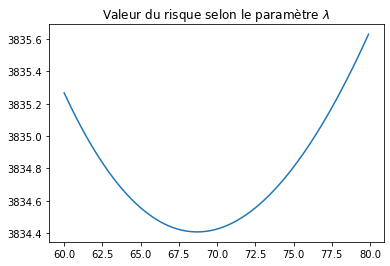

In [27]:
# représentation graphique du risque contre les valeurs de lambda
fig = plt.figure()
plt.plot(records[:,0], records[:,1]);
plt.title('Valeur du risque selon le paramètre $\lambda$');

In [28]:
print("Le paramètre de régularisation optimal est de lambda = " + str(round(best_lamda, 3)) + ".")
print("Le risque (non normalisé) correspondant au paramètre optimal lambda est de R_k = " + str(round(best_risk, 3)) + ".")

Le paramètre de régularisation optimal est de lambda = 68.7.
Le risque (non normalisé) correspondant au paramètre optimal lambda est de R_k = 3834.407.


On remarque que la valeur optimale pour $\lambda$ est plutot élevée. Autrement dit, la pénalisation est forte sur les coefficients du modèle. En réalité, ce n'est pas étonnant. Comme la plupart des variables du modèles sont en réalité inutiles, la méthodologie Ridge essaie de les pénaliser fortement pour en réduire l'impact autant que possible. La limite de cette approche toutefois est que toutes les variables seront fortement pénalisées: même les quelques variables pertinentes verront leurs coefficients amoindris, et il est donc possible que le modèle s'avère peu performant.

In [29]:
# on applique la regression Ridge avec le paramètre optimal sur les données test originales
sc = StandardScaler(with_std = False)
X_train_c = sc.fit_transform(X_train_np)
y_train_c = sc.fit_transform(y_train_np.reshape(-1, 1))
X_test_c = sc.fit_transform(X_test_np)
y_test_c = sc.fit_transform(y_test_np.reshape(-1, 1))
# estimation du modèle Ridge sur l'ensemble train
clf = Ridge(alpha=best_lamda, fit_intercept = False)
clf.fit(X_train_c, y_train_c)
# prediction sur l'ensemble test
pred_ridge = clf.predict(X_test_c)
res_ridge = y_test_c - pred_ridge
# variance empirique des résidus pour le modèle Ridge
sigma2_ridge = (np.transpose(res_ridge) @ res_ridge)[0][0] / (nobs_test - 1)
# rang de X_test_c
rank_ridge = matrix_rank(X_test_c)
# calcul du risque prédictif, en reprenant la formule de l'exercice 7
rpred_ridge = rank_ridge * sigma2_ridge / nobs_test
# affichage des résultats
print("Le risque prédictif sans ACP sur l'échantillon test est de " + str(round(rpred_noacp, 3)) + ".")
print("Le risque prédictif avec ACP sur l'échantillon test est de " + str(round(rpred_acp, 3)) + ".")
print("Le risque prédictif avec forward selection sur l'échantillon test est de " + str(round(rpred_fwd, 3)) + ".")
print("Le risque prédictif avec le modèle Ridge sur l'échantillon test est de " + str(round(rpred_ridge, 3)) + ".")

Le risque prédictif sans ACP sur l'échantillon test est de 4978.945.
Le risque prédictif avec ACP sur l'échantillon test est de 2067.443.
Le risque prédictif avec forward selection sur l'échantillon test est de 335.642.
Le risque prédictif avec le modèle Ridge sur l'échantillon test est de 1993.789.


De manière peu surprenante, les résultats obtenus par la régression Ridge sont meilleurs que ceux du modèle sans ACP, équivalents à ceux du modèle avec ACP, et significativement moins bons que ceux du modèle avec forward selection. Ceci est vraissemblablement du aux raisons discutées ci-dessus, à savoir d'une part que le Ridge ne supprime pas les variables inadéquates mais se contente de les pénaliser, et d'autre part que la pénalisation affecte aussi les variables pertinentes.

13. A l’aide de la fonction lassoCV de sklearn, choisir le paramètre de régularisation du LASSO. Donner le risque de prédiction associé.

In [30]:
# on fait tourner l'optimiseur
lasso = Lasso(random_state=0, max_iter=10000)
lasso_cv = LassoCV( cv=5, random_state=0, max_iter=10000)
k_fold = KFold(3)
for k, (train, test) in enumerate(k_fold.split(X_train_np, y_train_np)):
    lasso_cv.fit(X_train_np[train], y_train_np[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X_train_np[test], y_train_np[test])))
print("")
print("La valeur alpha optimale sélectionnée par la grille est de " + str(round(lasso_cv.alpha_, 3)) + ".")

[fold 0] alpha: 6.38947, score: 0.44345
[fold 1] alpha: 8.90382, score: 0.46918
[fold 2] alpha: 6.39385, score: 0.40701

La valeur alpha optimale sélectionnée par la grille est de 6.394.


In [31]:
# on estime maintenant le modèle lasso avec le meilleur alpha
lasso = Lasso(alpha = lasso_cv.alpha_, max_iter=10e5)
lasso.fit(X_train_np, y_train_np)
# variables sélectionnées par le lasso
lasso_var = np.where(lasso.coef_!=0)[0]
# nombre de variables sélectionnées
lasso_num = np.sum(lasso.coef_!=0)
# affichage des résultats
print("Le modèle lasso a retenu " + str(lasso_num) + " variables, qui sont:")
print("")
print(lasso_var)

Le modèle lasso a retenu 7 variables, qui sont:

[ 13  58 123 129 135 167 174]


In [32]:
# création des échantillons d'apprentissage et de test pour les variables retenues par le lasso
X_train_lasso , X_test_lasso, y_train_lasso, y_test_lasso = model_selection.train_test_split(data[lasso_var], y, test_size=0.2, random_state = 42)
# estimation de la regression avec les variables du lasso
reg_lasso = linear_model.LinearRegression(fit_intercept=True)
reg_lasso.fit(X_train_lasso, y_train_lasso)
# residus de la régression avec lasso
pred_lasso = reg_lasso.predict(X_test_lasso)
res_lasso = y_test_lasso - pred_lasso
# variance empirique des résidus pour le modèle lasso
sigma2_lasso = res_lasso @ res_lasso / (nobs_test - 1)
# rang de X_test_lasso
rank_lasso = matrix_rank(X_test_lasso)
# calcul du risque prédictif, en reprenant la formule de l'exercice 7
rpred_lasso = rank_lasso * sigma2_lasso / nobs_test
# affichage des résultats
print("Le risque prédictif sans ACP sur l'échantillon test est de " + str(round(rpred_noacp, 3)) + ".")
print("Le risque prédictif avec ACP sur l'échantillon test est de " + str(round(rpred_acp, 3)) + ".")
print("Le risque prédictif avec forward selection sur l'échantillon test est de " + str(round(rpred_fwd, 3)) + ".")
print("Le risque prédictif avec le modèle Ridge sur l'échantillon test est de " + str(round(rpred_ridge, 3)) + ".")
print("Le risque prédictif avec le modèle Lasso sur l'échantillon test est de " + str(round(rpred_lasso, 3)) + ".")

Le risque prédictif sans ACP sur l'échantillon test est de 4978.945.
Le risque prédictif avec ACP sur l'échantillon test est de 2067.443.
Le risque prédictif avec forward selection sur l'échantillon test est de 335.642.
Le risque prédictif avec le modèle Ridge sur l'échantillon test est de 1993.789.
Le risque prédictif avec le modèle Lasso sur l'échantillon test est de 214.281.


Le risque prédictif obtenu avec le modèle lasso est de 214 environ. Il est très inférieur à celui de tous les modèles concurrents. Il est 20 fois moindre que celui du modèle OLS sans ACP et 10 fois moindre que celui du modèle avec ACP. Il est intéressant de noter la différence avec le modèle Ridge: alors que les deux modèles sont des modèles de régularisation, leurs performances sont très différentes. Le modèle Ridge obtient une performance médiocre car il se contente de réduite l'impact des variables non pertinentes sans les supprimer. A l'inverse, le modèle lasso est parcimonieux et supprime toutes les variables non pertinentes (dans mon cas, il ne garde que 7 variables, donc il a aussi supprimé trois variables utiles), ce qui améliore significativement la performance prédictive. A noter que le modèle lasso est également meilleur que le modèle avec forward sélection, même si celui-ci reste de loin préférable aux autres alternatives.


15. Cette dernière question est un question d’ouverture vers une approche non-linéaire. En utilisant les variables séléctionées par le LASSO (Q13) ou par la méthode forward (Q9), mettre au point une méthode de regression non-linéaire. On apprendra les différents paramètres par validation croisée et l’on donnera la valeur du risque de prédiction calculé sur l’échantillon test. Des performances moindres par rapport à OLS peuvent se produire. Commenter.

Je propose pour cette question un modèle de régression non linéaire intégrant les polynomes des variables retenues avec la méthode de forward sélection de la question 9. Pour garder les choses simples, j'inclus uniquement les polynomes de degré 2, soit les variables au carrés et les produits de paires de variables. Le modèle obtenu est de la forme:

$Y = \theta_0 + \theta_1 X_1 + \ldots + \theta_n X_n + \beta_1 X_1^2 + \ldots + \beta_n X_n^2 + \gamma_1 X_1 X_2 + \ldots + \gamma_m X_{n-1} X_{n}$

Comme beaucoup de variables seront incluses dans le modèle, et que toutes ne seront vraissemblablement pas bénéfiques en termes de prédiction, j'utilise la méthode lasso pour supprimer les variables non pertinentes et obtenir un modèle parcimonieux. Le modèle est donc entrainé par validation croisée, et la valeur optimale du coefficient de régularisation sera obtenue par la méthode k-folds, similairement à la question 13.

In [33]:
# variables obtenues à la question 9
X1 = data[list(final_X)]
# carrés des variables
X2 = X1.applymap(lambda x: x**2)
# produits par paires
nrows, ncol = X1.shape
X3 = pd.DataFrame()
for i in range (ncol):
    for j in range(i+1, ncol):
        X3 = pd.concat([X3, X1.iloc[:,i]*X1.iloc[:,j]], axis=1)
X_nl = pd.concat([X1, X2], axis=1)
X_nl = pd.concat([X_nl, X3], axis=1)
X_nl.columns = np.arange(len(X_nl.columns))
# création des échantillons d'apprentissage et de test
X_train_nl, X_test_nl, y_train_nl, y_test_nl = model_selection.train_test_split(X_nl, y, test_size=0.2, random_state = 42)
# conversion numpy
X_train_nl = X_train_nl.values
y_train_nl = y_train_nl.values
X_test_nl = X_test_nl.values
y_test_nl = y_test_nl.values
# on fait tourner l'optimiseur
lasso = Lasso(random_state=0, max_iter=10000)
lasso_cv = LassoCV( cv=5, random_state=0, max_iter=10000)
k_fold = KFold(4)
for k, (train, test) in enumerate(k_fold.split(X_train_nl, y_train_nl)):
    lasso_cv.fit(X_train_nl[train], y_train_nl[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X_train_nl[test], y_train_nl[test])))
print("")
print("La valeur alpha optimale sélectionnée par la grille est de " + str(round(lasso_cv.alpha_, 3)) + ".")

[fold 0] alpha: 3.10114, score: 0.42124
[fold 1] alpha: 4.27398, score: 0.35290
[fold 2] alpha: 3.19168, score: 0.56233
[fold 3] alpha: 2.25200, score: 0.40023

La valeur alpha optimale sélectionnée par la grille est de 2.252.


In [34]:
# on estime maintenant le modèle lasso avec le meilleur alpha
lasso = Lasso(alpha = lasso_cv.alpha_, max_iter=10e5)
lasso.fit(X_train_nl, y_train_nl)
# variables sélectionnées par le lasso
lasso_var = np.where(lasso.coef_!=0)[0]
# nombre de variables sélectionnées
lasso_num = np.sum(lasso.coef_!=0)
# affichage des résultats
print("Le modèle lasso a retenu " + str(lasso_num) + " variables, qui sont:")
print("")
print(lasso_var)

Le modèle lasso a retenu 28 variables, qui sont:

[ 0  1  2  3  4  5  6  7  8  9 10 11 15 19 21 23 24 25 28 35 40 48 52 53
 55 59 62 63]


In [35]:
# création des échantillons d'apprentissage et de test pour les variables retenues par le lasso
X_train_lasso , X_test_lasso, y_train_lasso, y_test_lasso = model_selection.train_test_split(X_nl[lasso_var], y, test_size=0.2, random_state = 42)
# estimation de la regression avec les variables du lasso
reg_lasso = linear_model.LinearRegression(fit_intercept=True)
reg_lasso.fit(X_train_lasso, y_train_lasso)
# residus de la régression avec forward selection
pred_lasso = reg_lasso.predict(X_test_lasso)
res_lasso = y_test_lasso - pred_lasso
# variance empirique des résidus pour le modèle avec ACP 
sigma2_lasso = res_lasso @ res_lasso / (nobs_test - 1)
# rang de X_fwd
rank_lasso = matrix_rank(X_test_lasso)
# calcul du risque prédictif, en reprenant la formule de l'exercice 7
rpred_lasso2 = rank_lasso * sigma2_lasso / nobs_test
# affichage des résultats
print("Le risque prédictif sans ACP sur l'échantillon test est de " + str(round(rpred_noacp, 3)) + ".")
print("Le risque prédictif avec ACP sur l'échantillon test est de " + str(round(rpred_acp, 3)) + ".")
print("Le risque prédictif avec forward selection sur l'échantillon test est de " + str(round(rpred_fwd, 3)) + ".")
print("Le risque prédictif avec le modèle Ridge sur l'échantillon test est de " + str(round(rpred_ridge, 3)) + ".")
print("Le risque prédictif avec le modèle Lasso linéaire sur l'échantillon test est de " + str(round(rpred_lasso, 3)) + ".")
print("Le risque prédictif avec le modèle Lasso non linéaire sur l'échantillon test est de " + str(round(rpred_lasso2, 3)) + ".")

Le risque prédictif sans ACP sur l'échantillon test est de 4978.945.
Le risque prédictif avec ACP sur l'échantillon test est de 2067.443.
Le risque prédictif avec forward selection sur l'échantillon test est de 335.642.
Le risque prédictif avec le modèle Ridge sur l'échantillon test est de 1993.789.
Le risque prédictif avec le modèle Lasso linéaire sur l'échantillon test est de 214.281.
Le risque prédictif avec le modèle Lasso non linéaire sur l'échantillon test est de 1028.846.


On remarque que le modèle non linéaire amène des performances correctes. Notamment, les performances sont meilleures que le modèle linéaire simple (avec ou sans ACP) et que le modèle Ridge. Toutefois, les performances restent moins bonnes que celles du modèle avec forward sélection, et, surtout, que celles du modèle lasso linéaire. Celà implique clairement que les données sont mieux représentées par un système linéaire que par un système polynomial. Dans ce cas, un système non-linéaire n'était pas une hypothèse appropriée, ou, à tout le moins, la forme de non-linéarité sélectionnée n'était pas la plus adéquate.